In [118]:
import kdegree
import networkx as nx 
import numpy as np

I'm gonna select the degree k and the dataset to anonymize:

In [119]:
file_graph = "Dataset/graph_friend_5_10_5.csv"
k_degree = 5 

Then the dataset must be properly parsed to a graph. For now, it's basically a list of lists. 

['Timmings', 'Conlin', 'Jude', 'Smeeton', 'Gubbins', 'Lead', 'Jeanes', 'Cummings', 'Selden', 'Newton', 'Clavering', 'Ching', 'Quinton', 'Boulding', 'Cuckson', 'Weyman', 'Fillingham', 'Merrills', 'Tackley', 'Hallett', 'Kings', 'Pibbles', 'Follows', 'Sidey', 'Lanigan', 'Allmond', 'Bendals', 'Samuels', 'Atfield', 'Sympson', 'Broughton', 'Housley', 'Kneller', 'Birchell', 'Mobbs', 'Wardell', 'Mollyneux', 'Embleton', 'Vinson', 'Lauer', 'Jorey', 'Kiernan', 'Surbats', 'Gilfellon', 'Gabb', 'Gwyther', 'Bray', 'Wainwright', 'Hextall', 'Bloye', 'Bellwood', 'Littleton', 'Trueman', 'Burnston', 'Stinnard', 'Child', 'Sampayo', 'Seagur', 'Margetts', 'Leightley', 'Chappel', 'Stanaway', 'Berton', 'Hows', 'Wotton', 'Gauge', 'Boothroyd', 'Pim', 'Burchett', 'Christie', 'Punyard', 'Wace', 'Mullinger', 'Hincks', 'Pymer', 'Moorfield', 'Dhoerty', 'Sleigh', 'Sugar', 'Gilbart', 'Broderick', 'Onillon', 'Walley', 'Stillwell', 'Chalke', 'Chatterson', 'Goldspink', 'Chilcott', 'Warhurst', 'Rands', 'Bourke', 'Hardstaff

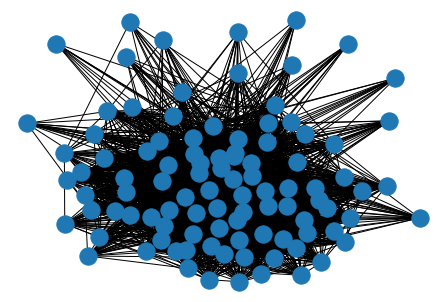

In [120]:
G = nx.Graph()
    
if os.path.exists(file_graph): 
    # if file exist
    with open(file_graph) as f:
        content = f.readlines()
    # read each line
    content = [x.strip() for x in content]
    for line in content:
        # split name inside each line
        names = line.split(",")
        start_node = names[0]
        if start_node not in G:
            G.add_node(start_node)
        for index in range(1, len(names)):
            node_to_add = names[index]
            if node_to_add not in G:
                G.add_node(node_to_add)
            G.add_edge(start_node, node_to_add)

print(G.nodes)

nx.draw(G)

To anonymize the graph, we must define the array d containing all the degrees of the nodes. Then sort it to pass it to the greedy algorithm. array_index is the sorted array containing the index of the original array d. 

For example,  
d =  `[2, 3, 3, 1, 1]`  
array_index = `[]`

In [121]:
# Degree arrays preparation
d = [x[1] for x in G.degree()]
array_index = np.argsort(d)[::-1]
array_degrees = np.sort(d)[::-1]
print("Array of degrees (d):\n {}\n".format(d))
print("Array of degrees sorted (array_degrees):\n {}".format(array_degrees))
array_degrees_greedy = array_degrees
# TODO insert here the code

Array of degrees (d):
 [97, 15, 74, 12, 54, 52, 41, 38, 74, 65, 62, 37, 25, 96, 33, 56, 11, 62, 33, 30, 53, 62, 13, 21, 59, 48, 46, 65, 51, 49, 17, 14, 72, 64, 72, 33, 53, 10, 64, 43, 51, 31, 30, 76, 38, 45, 29, 57, 78, 64, 64, 97, 52, 57, 65, 47, 67, 43, 32, 14, 41, 10, 56, 59, 30, 89, 42, 38, 58, 53, 75, 58, 42, 56, 43, 55, 38, 40, 45, 49, 51, 44, 50, 56, 38, 35, 76, 83, 17, 27, 38, 63, 34, 42, 25, 51, 48, 64, 65, 23]

Array of degrees sorted (array_degrees):
 [97 97 96 89 83 78 76 76 75 74 74 72 72 67 65 65 65 65 64 64 64 64 64 63
 62 62 62 59 59 58 58 57 57 56 56 56 56 55 54 53 53 53 52 52 51 51 51 51
 50 49 49 48 48 47 46 45 45 44 43 43 43 42 42 42 41 41 40 38 38 38 38 38
 38 37 35 34 33 33 33 32 31 30 30 30 29 27 25 25 23 21 17 17 15 14 14 13
 12 11 10 10]


In [122]:
kdegree.greedy_rec_algorithm(d, array_degrees_greedy, k_degree, 0, k_degree)

In [123]:
graph_greedy = kdegree.construct_graph(array_index, array_degrees_greedy)
print("graph_greedy_nodes: ")
print(graph_greedy.nodes)
print()
print("graph_greedy_nodes sorted: ")
print(np.sort(graph_greedy.nodes))

graph_greedy_nodes: 
[7, 0, 51, 13, 65, 87, 48, 43, 86, 70, 2, 8, 56, 9, 54, 32, 34, 98, 27, 50, 33, 38, 49, 21, 63, 17, 91, 10, 97, 24, 71, 68, 53, 47, 15, 83, 75, 20, 4, 73, 62, 19, 69, 36, 5, 52, 40, 82, 80, 28, 95, 79, 29, 25, 96, 55, 26, 45, 78, 81, 57, 59, 12, 92, 39, 72, 6, 89, 22, 31, 74, 93, 66, 60, 14, 77, 90, 76, 67, 84, 44, 11, 85, 18, 35, 58, 41, 94, 42, 64, 46, 1, 88, 30, 23, 99, 61, 16, 37, 3]

graph_greedy_nodes sorted: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
